# This is the notebook to generate data for Heter_samples
# Experiments are generated one by one with different config file. See Heter_samples for individual config files.

In [ ]:
import os
import json
import pathlib
import numpy as np
import pandas as pd
from dda import DDA
np.random.seed(0)

# Specify the experiment to run

In [ ]:
# Assign atom types according to the ratio below and save atomList to the experimental folder
current_folder_path = pathlib.Path().absolute()
# We will create a subfolder named as "exp3" later
exp_index = '/exp3'
# Specify the ratio between component 1 and component 2 for this simulation
ratio = np.array([0.8,0.2])
# read in the atom list
atom_list = pd.read_csv(str(current_folder_path)+'/Heter_samples'+'/atomList_Octahedron.csv',delimiter=",",header=None)
# assign the atom type according to the ratio
atom_list.iloc[:,0] = np.random.choice(['Au','Ag'],len(atom_list),p = ratio)
# save the atom list for individual experiments
atom_list.to_csv(str(current_folder_path)+'/Heter_samples' + exp_index +'/atomList_Octahedron.csv',index=False,header=False)

# Set the config file for the experiment

In [ ]:
# GPU Device Config
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="3"
# Define the Config file
# It is important to define the atom_data
config = {'gpu_device': '/GPU:0',
          'dipole_length': 1,
          'min_wavelength': 0.4,
          'max_wavelength': 0.8,
          'num_wavelengths': 41,
          'ref_medium': 1.333,
          'rotation_steps': 10,
          'folder_path': None,
          'calculate_electricField': False,
          'lattice_constant': 0.41,
          'ref_data': [str(current_folder_path) + '/Au_ref_index.csv',str(current_folder_path) + '/Ag_ref_index.csv'],
          'metals': ["Au","Ag"],
          'dipole_data': str(current_folder_path)+'/Heter_samples' + '/dipole_list.csv',
          'atom_data': str(current_folder_path)+'/Heter_samples' + exp_index + '/atomList_Octahedron.csv',
          "ratio":None,
          "method":"heter_atomic",
        }

In [ ]:
config['folder_path'] = str(current_folder_path) + '/Heter_samples' + exp_index
with open(config['folder_path']+'/config.json','w') as outfile:
    json.dump(config,outfile) 
# define the DDA object
np_dda = DDA(config)

In [ ]:
# perform the calculation
np_dda.run_DDA()
np_dda.plot_spectra()

# Once the run is all done, compare all the results 
# They should be very similar if the atom number is large enough
# In our case, atom number is ca. 210000.

0.0


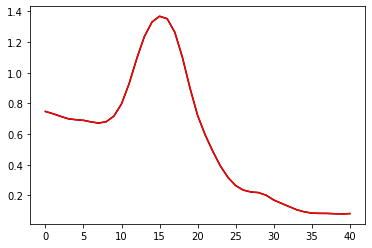

0.0021556615829467773


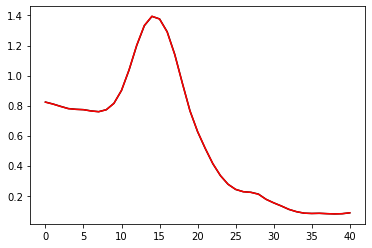

0.0024651288986206055


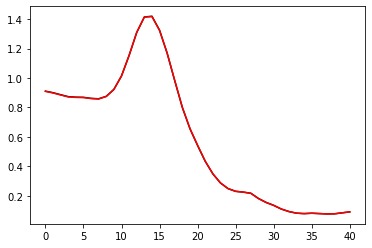

0.006728529930114746


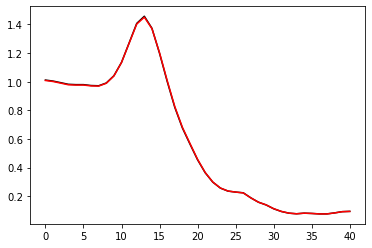

0.0036945343017578125


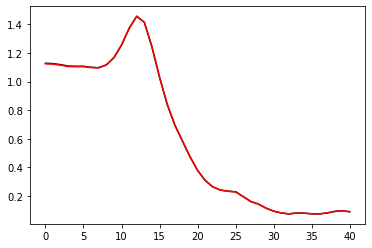

In [10]:
from matplotlib import pyplot as plt
for i in range(1,6):
    path1 = str(current_folder_path)+'/Heter_samples' + f'/exp{i}' + '/Results.csv'
    path2 = str(current_folder_path)+'/Homo_samples' + f'/exp{i}' + '/Results.csv'
    data1 = np.loadtxt(path1,delimiter=',')
    data2 = np.loadtxt(path2,delimiter=',')
    print(max(abs(data1 - data2)))
    plt.figure()
    plt.plot(data1,c = 'black')
    plt.plot(data2,c = 'red')
    plt.show()
    plt.close()